### This notebook explores using the Docbank preprocessing for datasheets

key features:
- Iterates through the processed examples of one datasheet
- Displays each page with corresponding labels and the dataframe of labels

Potential:
- Using the labels of bolded texts to narrow down where the headers are
- Combine these insights with table extractions using pdfplumber etc
- Train a model with positional information as well as textual information

In [39]:
import os
from PIL import Image

In [40]:
output_dir = "outs"

In [41]:
filepaths_dict = {"ann" : [], "ori" : [], "txt" : []} 
for file in os.listdir(output_dir):
    fp = os.path.join(output_dir, file)
    if fp.endswith("ann.jpg"):
        filepaths_dict["ann"].append(fp) 
    elif fp.endswith("ori.jpg"):
        filepaths_dict["ori"].append(fp)
    else:
        filepaths_dict["txt"].append(fp)

In [42]:
import re
filepaths_dict = {k:sorted(v,key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)]) for (k,v) in  filepaths_dict.items()}

textual labels with format and positioning information

     STM8S103F2  474   94  676  117  BNOLHA+Arial,Bold
0    STM8S103F3  685   94  887  117  BNOLHA+Arial,Bold
1    STM8S103K3  681  120  887  143  BNOLHA+Arial,Bold
2        Access  174  150  257  169       BNOLGO+Arial
3         line,  265  150  312  169       BNOLGO+Arial
4            16  320  150  349  169       BNOLGO+Arial
..          ...  ...  ...  ...  ...                ...
422  ##LTLine##  791  351  794  351            default
423  ##LTLine##  791  353  794  353            default
424  ##LTLine##  791  352  794  352            default
425  ##LTLine##  791  355  794  355            default
426  ##LTLine##  791  378  829  378            default

[427 rows x 6 columns]


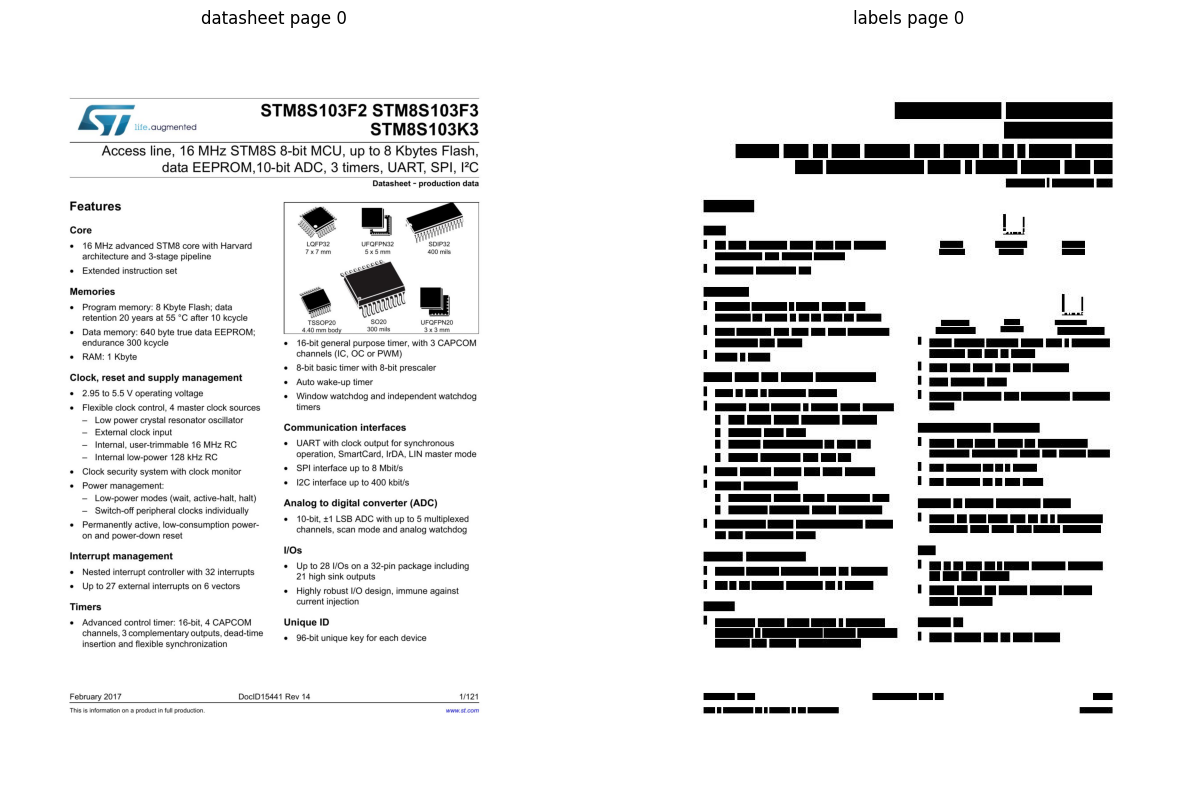

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

base_dir = "outs"


for i, ann in enumerate(filepaths_dict["ann"]):
    ann_im = Image.open(ann)
    ori_im = Image.open(filepaths_dict["ori"][i])
    fig, ax = plt.subplots(1,2) 
    ax[0].imshow(ori_im)
    ax[1].imshow(ann_im)
    ax[0].axis("off") 
    ax[1].axis("off")
    ax[0].set_title(f"datasheet page {i}")
    ax[1].set_title(f"labels page {i}")
    fig.set_figheight(15)
    fig.set_figwidth(15)
    if i ==1: 
        break
    df = pd.read_table(filepaths_dict["txt"][i])
    print("textual labels with format and positioning information\n")
    print(df)

    display(fig)
    plt.close(fig)
plt.close(fig)